# Log 1.1
1. Run again with augmented training data features and labels
2. No particular change in results, overtraining after 40 epochs, about 70% accuracy
3. Idea: try fewer layers again


In [1]:
# load features and labels
import keras
#keras.__version__ 2.4.3
import numpy as np

train_features = np.load("saved_train_features_augmented.npy"); # load augmented data features
validation_features = np.load("saved_validation_features.npy");
test_features = np.load("saved_test_features.npy");
train_labels = np.load("saved_train_labels_augmented.npy"); # load augmented data labels
validation_labels = np.load("saved_validation_labels.npy");
test_labels = np.load("saved_test_labels.npy");


In [2]:
# build network and print summary
from keras import layers
from keras import models
from keras import regularizers

model = models.Sequential()
model.add(layers.Dense(2*2*128, kernel_regularizer=regularizers.l2(0.001), activation='relu', input_dim=4*4*512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(2*128, kernel_regularizer=regularizers.l2(0.001), activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(2*2*64, kernel_regularizer=regularizers.l2(0.001), activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(2*2*32, kernel_regularizer=regularizers.l2(0.001), activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(2*2*16, kernel_regularizer=regularizers.l2(0.001), activation='relu'))
model.add(layers.Dense(6, activation='softmax'))

model.summary()


# add optimizer
from keras import optimizers

model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               4194816   
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               65792     
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               3

In [3]:
# train and save model
history = model.fit(train_features, train_labels,
                    epochs=100,
                    batch_size=20,
                    validation_data=(validation_features, validation_labels))

model.save('trash-classifier-1-1.h5')

Epoch 1/100
58/58 [==============================] - 5s 90ms/step - loss: 3.6425 - acc: 0.1371 - val_loss: 3.3325 - val_acc: 0.2163
Epoch 2/100
58/58 [==============================] - 5s 90ms/step - loss: 3.3072 - acc: 0.1914 - val_loss: 3.1676 - val_acc: 0.2011
Epoch 3/100
58/58 [==============================] - 5s 91ms/step - loss: 3.1260 - acc: 0.2233 - val_loss: 3.0189 - val_acc: 0.2141
Epoch 4/100
58/58 [==============================] - 5s 93ms/step - loss: 3.0048 - acc: 0.2069 - val_loss: 2.9018 - val_acc: 0.2261
Epoch 5/100
58/58 [==============================] - 6s 95ms/step - loss: 2.8875 - acc: 0.2259 - val_loss: 2.8321 - val_acc: 0.2228
Epoch 6/100
58/58 [==============================] - 6s 96ms/step - loss: 2.7894 - acc: 0.2448 - val_loss: 2.7427 - val_acc: 0.2250
Epoch 7/100
58/58 [==============================] - 6s 107ms/step - loss: 2.7119 - acc: 0.2431 - val_loss: 2.6433 - val_acc: 0.2793
Epoch 8/100
58/58 [==============================] - 6s 102ms/step - loss: 

58/58 [==============================] - 6s 103ms/step - loss: 0.8666 - acc: 0.8603 - val_loss: 1.7513 - val_acc: 0.6728
Epoch 63/100
58/58 [==============================] - 5s 93ms/step - loss: 0.8952 - acc: 0.8664 - val_loss: 1.7496 - val_acc: 0.6772
Epoch 64/100
58/58 [==============================] - 6s 97ms/step - loss: 0.8561 - acc: 0.8621 - val_loss: 1.7540 - val_acc: 0.6935
Epoch 65/100
58/58 [==============================] - 6s 96ms/step - loss: 0.8353 - acc: 0.8759 - val_loss: 1.9117 - val_acc: 0.6728
Epoch 66/100
58/58 [==============================] - 5s 95ms/step - loss: 0.8187 - acc: 0.8733 - val_loss: 1.9068 - val_acc: 0.6652
Epoch 67/100
58/58 [==============================] - 6s 102ms/step - loss: 0.8281 - acc: 0.8845 - val_loss: 1.9557 - val_acc: 0.6728
Epoch 68/100
58/58 [==============================] - 5s 94ms/step - loss: 0.7761 - acc: 0.8853 - val_loss: 2.0797 - val_acc: 0.6837
Epoch 69/100
58/58 [==============================] - 6s 101ms/step - loss: 0.78

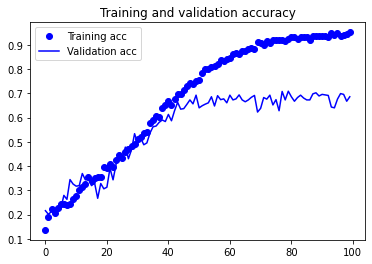

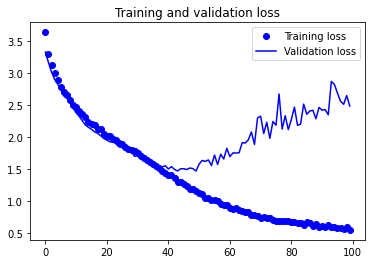

In [4]:
# plot accuracy and loss graphs
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()